## Taken's embedding Theorem

In [1]:
## instalações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nolitsa import dimension, delay

import plotly.express as px
import plotly.graph_objects as go

from sktime.datasets import load_airline, load_shampoo_sales, load_lynx

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

from gtda.time_series import SingleTakensEmbedding, takens_embedding_optimal_parameters
from openml.datasets.functions import get_dataset

In [2]:
## Implementação Taken's
def takens(data, m = 2, d = 1):
    emb = np.array([data[0:len(data) - d*m]])
    for i in range(1, m):
        emb = np.append(emb, [data[i*d:len(data) - d*(m-i)]], axis = 0)
    return emb.T

### Embedding da função seno

In [3]:
t = [i for i in np.arange(0, 20, 0.1)]
y = [np.sin(i) for i in t]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x = t,
    y = y,
    mode = 'lines'
))

In [10]:
emb = takens(y)

fig = go.Figure()
fig.add_trace(go.Scatter(
    x = emb[:, 0],
    y = emb[:, 1],
   # z = [0 for i in range(len(emb[:, 1]))],
    mode = 'lines'
))
fig.show()

### Embedding da função de Lorenz

In [5]:
lorenz = get_dataset(42182).get_data(dataset_format = 'array')[0][0:,0]
t = [i for i in range(len(lorenz))]

In [8]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = t,
    y = lorenz,
    mode = 'lines'
))

In [13]:
emb = takens(lorenz, m = 3, d = 5)
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x = emb[:, 0],
    y = emb[:, 1],
    z = emb[:, 2],
    mode = 'lines'
))
fig.show()

In [14]:
STE = SingleTakensEmbedding(parameters_type = 'fixed',
                            time_delay = 5,
                            dimension = 3,
                            n_jobs = -1)
emb = STE.fit_transform(lorenz)

fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x = emb[:, 0],
    y = emb[:, 1],
    z = emb[:, 2],
    mode = 'lines'
))
fig.show()

### Mutual information plot

<BarContainer object of 20 artists>

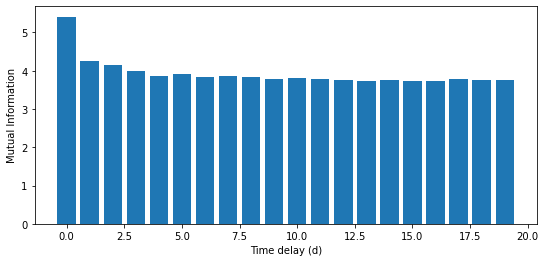

In [33]:
t = [i for i in np.arange(0, 20, 0.1)]
y = [np.sin(i) for i in t]

plt.figure(figsize = (9,4))
plt.xlabel('Time delay (d)')
plt.ylabel('Mutual Information')
plt.bar(x = [i for i in np.arange(20)], height = delay.dmi(y, maxtau = 20))

In [ ]:
# O primeiro mínimo local nesse caso é encontrado em d = 4

In [34]:
def find_optimal_delay(x, max_tau = 50):
    mi = delay.dmi(x, maxtau = max_tau)
    diffmi = np.diff(mi)
    return np.where(diffmi > 0)[0][0]

find_optimal_delay(y)

4

### False Nearest Neighbors - dimension

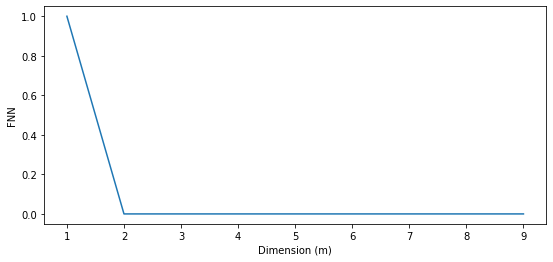

In [47]:
dim = np.arange(1,10)
f1, f2, f3 = dimension.fnn(y, tau = 4, dim = dim)

plt.figure(figsize = (9,4))
plt.xlabel('Dimension (m)')
plt.ylabel('FNN')
plt.plot(dim, f1)

In [42]:
### O número de dimensões que vai pra baixo de 20% do número de falsos vizinhos é m = 2 

In [44]:
def find_optional_dimension(x, tau, max_dim=10):
    dim = np.arange(1, max_dim)
    f1, f2, f3 = dimension.fnn(x, tau=tau, dim=dim)

    return np.where(f1 < 0.2)[0][0] + 1

find_optional_dimension(y, tau = 4)

2

### Implementação FNN e MI por Giotto

In [82]:
def manual_optimal_parameters(x):
    d = find_optimal_delay(x)
    m = find_optional_dimension(x, tau = d)

    print("d, m = ", (d, m))

In [49]:
print(takens_embedding_optimal_parameters(y, max_time_delay = 50, max_dimension = 10))
manual_optimal_parameters(y)

(16, 7)
(4, 2)


In [50]:
print(takens_embedding_optimal_parameters(lorenz, max_time_delay = 50, max_dimension = 10))
manual_optimal_parameters(lorenz)

(50, 5)
(26, 3)


### Embeddings - exemplos

#### Airline Data

In [52]:
lorenzairline = load_airline()
t = [i for i in range(len(airline))]
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = t,
    y = airline,
    mode = 'lines'
))
fig.show()

In [79]:
STE = SingleTakensEmbedding('search', n_jobs = -1)
emb = STE.fit_transform(airline)

print(STE.time_delay_, STE.dimension_)
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x = emb[:, 0],
    y = emb[:, 1],
    z = emb[:, 2],
    mode = 'lines'
))

1 3


In [83]:
manual_optimal_parameters(airline)

d, m =  (2, 2)


In [106]:
emb = takens(airline, m = 2, d = 2)
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = emb[:, 0],
    y = emb[:, 1],
    mode = 'lines'
))
fig.show()

#### Shampoo Data

In [99]:
shampoo = load_shampoo_sales()
t = np.arange(1, len(shampoo))

fig = go.Figure()
fig.add_trace(go.Scatter(
    x = t,
    y = shampoo,
    mode = 'lines'
))


In [100]:
STE = SingleTakensEmbedding('search', n_jobs = -1)
emb = STE.fit_transform(shampoo)
print(STE.time_delay_, STE.dimension_)

1 2


In [102]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = emb[:, 0],
    y = emb[:, 1],
    mode = 'lines'
))

#### Linx data

In [103]:
lynx = load_lynx()
t = [i for i in range(len(lynx))]
     
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=t, y=lynx, mode='lines'
))
fig.show()

In [104]:
STE = SingleTakensEmbedding('search', n_jobs=-1)
emb = STE.fit_transform(lynx)

print(STE.time_delay_, STE.dimension_)

1 3


In [105]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=emb[:, 0], y=emb[:,1], z=emb[:, 2], mode='lines'
))
fig.show()

### Forecasting séries temporais 


In [113]:
m=2
forecast_horizon = 10

In [124]:
def forecast_on_phase_space(y, m, d, forecast_horizon):
    emb = takens(y, m, d)

    # Divide entre treino e teste
    X = emb[:, :m-1]
    y = emb[:, m-1]

    X_train = X[:len(X) - forecast_horizon, :]
    y_train = y[:len(y) - forecast_horizon]
    X_test = X[len(X) - forecast_horizon:, :]
    y_test = y[len(y) - forecast_horizon:]

    # Fitando o regressor nos dados de treino
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)

    # Prevendo os dados de teste
    preds = rf.predict(X_test)

    print(f'R²: {r2_score(y_test, preds)}')
    print(f'RMSE: {mean_squared_error(y_test, preds, squared=False)}')

    # Plotando o resultado
    preds_ = [np.nan for i in range(len(y) - forecast_horizon)] + list(preds)
    t = np.arange(len(y))

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x = t,
        y = y, 
        mode = 'lines'
    ))

    fig.add_trace(go.Scatter(
        x = t,
        y = preds_,
        mode = 'lines',
        line = dict(color = 'red')
    ))
    fig.show()

In [128]:
forecast_on_phase_space(y, 2, 1, 20)

R²: -0.22077051514558566
RMSE: 85.43802011933855


In [126]:
forecast_on_phase_space(lorenz, 2, 1, 1000)

R²: 0.9967704676015232
RMSE: 0.22477312390757914


In [129]:
forecast_on_phase_space(airline, 3, 1, 50)

R²: -0.08455567705262501
RMSE: 84.58586574599802


In [130]:
forecast_on_phase_space(shampoo, 2, 1, 10)

R²: -4.058445087977823
RMSE: 228.72139820161107


In [131]:
forecast_on_phase_space(lynx, 3, 1, 50)

R²: 0.6087207213540246
RMSE: 1055.2535841891277


## EMD

A transformada de Hilbert-Huang ( HHT ) é uma maneira de decompor um sinal nas chamadas funções de modo intrínseco (IMF) junto com uma tendência e obter dados de frequência instantâneos. Como o sinal é decomposto no domínio do tempo e o comprimento dos IMFs é o mesmo do sinal original, o HHT preserva as características da frequência variável. Esta é uma vantagem importante do HHT, uma vez que o sinal do mundo real geralmente tem várias causas acontecendo em diferentes intervalos de tempo. O HHT fornece um novo método de análise de dados de séries temporais não estacionários e não lineares. Usando o método EMD, qualquer conjunto de dados complicado pode ser decomposto em um número finito e geralmente pequeno de componentes. Esses componentes formam uma base completa e quase ortogonal para o sinal original. Além disso, elas podem ser descritas como funções de modo intrínseco ( IMF ).

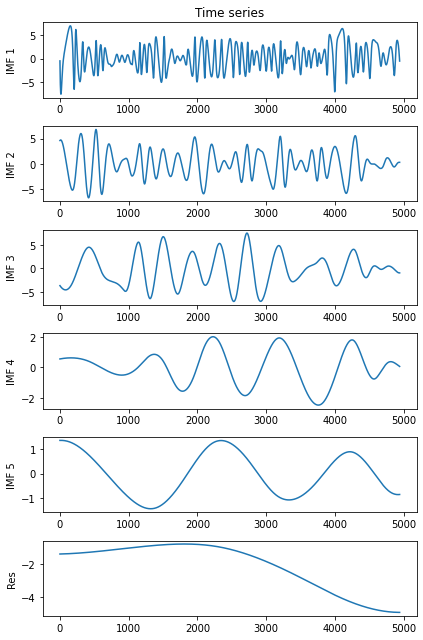

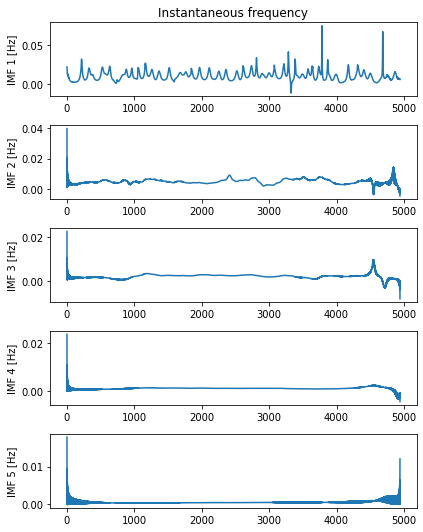

In [163]:
import numpy as np
from PyEMD import EMD, Visualisation

t = np.arange(len(np.array(lorenz)))
S = np.array(lorenz)

# Extract imfs and residue
# In case of EMD
emd = EMD()
emd.emd(S)
imfs, res = emd.get_imfs_and_residue()

# In general:
#components = EEMD()(S)
#imfs, res = components[:-1], components[-1]

vis = Visualisation()
vis.plot_imfs(imfs=imfs, residue=res, t = t, include_residue=True)
vis.plot_instant_freq(t, imfs=imfs)
vis.show()